## 示例

### 检查读取内容

In [1]:
from btree import BTree
from btree import *

In [2]:
# 旧树：通过一维列表输入
n = 8
positions = [None for i in range(2**n)]
pos = [1, 
       2,3, 
       4,5, 
       8,9,10,11, 
       16,17,22,23, 
       32,33,34,35,46,47,
       68,69,70,71,
       136,137,138,139,142,143]
value = [0,
        0,10,
        0,0,
        0,20,5,0,
        0,0,7,0,
        10,20,0,0,0,6,
        0,0,5,0,
        10,6,3,10,7,2]
for p,v in zip(pos,value):
    positions[p-1] = v
# 生成旧树
old_tree = BTree.list_to_tree(positions)
old_nodes = {node.position for node in old_tree}
old_leafs = {node.position for node in old_tree.leaves}

# 新树：非叶节点转树
new_trees = nonleaves_to_trees([1,2,1,2,1,2,0,0])
new_tree = new_trees[0]
new_leafs = {node.position for node in new_tree.leaves}
new_nodes = {node.position for node in new_tree}

# 索引树
tree_positions = [None for i in range(2**n)]
for p in pos:
    tree_positions[p-1] = p
pos_tree = BTree.list_to_tree(tree_positions)
# 打印图像，检验信息
print(new_tree)
print(old_tree)
print(pos_tree)
print(len(new_nodes),len(old_nodes))
# 节点信息
com = old_nodes.difference(old_leafs).intersection(new_leafs)
sep = new_nodes.difference(new_leafs).intersection(old_leafs)
com_leafs = {leaf for leaf in old_leafs if is_child(leaf,com)}
nodes = sep.union(com_leafs) # change nodes
com,sep,nodes


                            __0__
                           /     \
                    ______0       0
                   /       \     / \
                __0__       0   0   0
               /     \
        ______0       0
       /       \     / \
    __0__       0   0   0
   /     \
  0       0
 / \     / \
0   0   0   0


                                             ______________0
                                            /               \
                                        ___0__               10
                                       /      \
          ____________________________0        0__
         /                             \      /   \
     ___0________________               20   5     0__
    /                    \                        /   \
  _0               _______0__                    7     0
 /  \             /          \                        / \
10   20        __0__          0__                    0   6
              /     \        /   \
           

({5, 17},
 {3, 9, 32, 33},
 {3, 9, 10, 22, 32, 33, 46, 47, 70, 136, 137, 138, 139, 142, 143})

### 单个开销

In [4]:
# 新树节点信息
# 计算开销
cost = sum(positions[i-1] for i in nodes)
print("拆开的位置",sep,"\n合并的位置",com,"\n开销",cost)

拆开的位置 {32, 33, 3, 9} 
合并的位置 {17, 5} 
开销 121


### 求解最优

In [19]:
min_cost = sum(value) # 最小开销
optimals = [] # 最优解
opt_operates = [] # 最优操作

for new_tree in new_trees:
    # 计算操作内容
    new_leafs = {node.position for node in new_tree.leaves}
    new_nodes = {node.position for node in new_tree}
    com = old_nodes.difference(old_leafs).intersection(new_leafs)
    sep = new_nodes.difference(new_leafs).intersection(old_leafs)
    com_leafs = {leaf for leaf in old_leafs if is_child(leaf,com)}
    nodes = sep.union(com_leafs) # change nodes
    # 计算开销
    cost = sum(positions[i-1] for i in nodes)
    if cost == min_cost and (sep,com) not in opt_operates:
        optimals.append(new_tree)
        opt_operates.append((sep,com))
    elif cost < min_cost:
        min_cost = cost
        optimals= [new_tree]
        opt_operates = [(sep,com)]

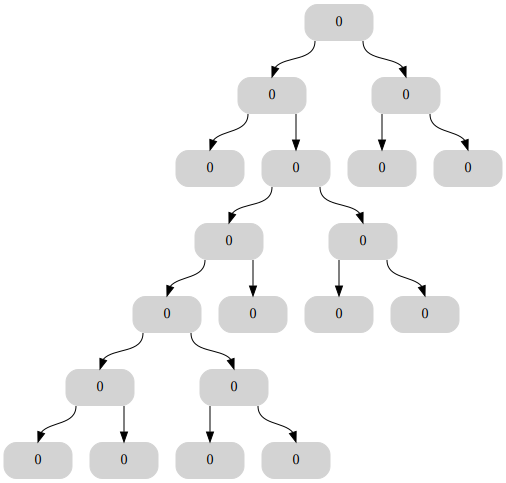

In [14]:
# 输出结果
print("初始图像",old_tree,"最小开销 %d"%min_cost,"最优解数 %d"%len(optimals),"-"*20,sep="\n")
for new_tree in optimals:
    new_leafs = {node.position for node in new_tree.leaves}
    new_nodes = {node.position for node in new_tree}
    com = old_nodes.difference(old_leafs).intersection(new_leafs)
    sep = new_nodes.difference(new_leafs).intersection(old_leafs)
    com_leafs = {leaf for leaf in old_leafs if is_child(leaf,com)}
    nodes = sep.union(com_leafs) # change nodes
    # 计算开销
    cost = sum(positions[i-1] for i in nodes)
    print(cost,nodes)
    print([positions[i-1] for i in nodes])
    print("\n展开位置",sep,"\n合并位置",com,"\n",new_tree,"\n操作节点",nodes)

In [ ]:
new_leafs

In [ ]:
old_leafs.difference(new_leafs)

In [ ]:
old_leafs = {node.position for node in old_tree.leaves}
new_leafs = {node.position for node in tree.leaves}
com = new_leafs.difference(old_leafs)
sep = old_leafs.difference(new_leafs)
com_nodes = sum([child_node_set(i,n) for i in com],[])
sum(positions[i-1] for i in com_nodes if positions[i-1] is not None)